In [1]:
import pandas as pd

In [3]:
nflDF = pd.read_csv('data/nflplaybyplay2009to2017//nfl2009_2017.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
nflDF = nflDF[nflDF.PlayType.isin(['Pass', 'Run'])]
playType = nflDF[['PlayType']]
playType.replace('Pass', 1, inplace=True)
playType.replace('Run', 0, inplace=True)
playType.reset_index(inplace=True, drop=True)

homeTeamDummy = pd.get_dummies(nflDF.HomeTeam)
awayTeamDummy = pd.get_dummies(nflDF.AwayTeam)
qtrDummy = pd.get_dummies(nflDF.qtr)

modelDF0 = pd.concat([playType, homeTeamDummy, awayTeamDummy, qtrDummy, nflDF[['TimeSecs', 'yrdln', 'ydsnet']]], axis=1)
modelDF0 = modelDF0.dropna()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
from sklearn.cross_validation import train_test_split
y = modelDF0.PlayType
X = modelDF0.drop('PlayType', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
lr.score(X_test, y_test)

0.5722052503495055

In [44]:
probs = lr.predict_proba(X_test)

In [45]:
preds = probs[:, 1]

In [46]:
from sklearn.metrics import roc_curve, auc

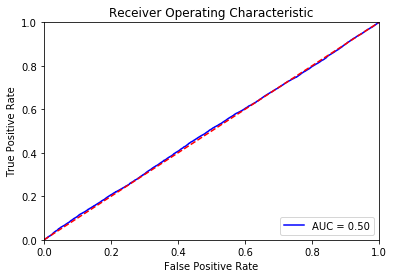

In [47]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()